# Frequency-Wavenumber Analysis of Eastern Boundary Currents from a high-resolution model

Cesar A. Perez Quintana, Hector S. Torres, Jose Gomez-Valdes

## Abstract 

Based on frequency-wavenumber spectra computed from a high resolution (1/48°, 25 s) model, we focus our study on the four major eastern boundary currents (California, Peru-Chile, Canarias and Benguela). Each current is analyzed using around 6 of these spectra, given they are square regions of side 6°. Our analysis focuses on similarities and differences among these current systems, primarily on the ratio of kinetic energy between balanced motions (BM) and (IGW), considering both summer and winter in order to perform a deeper comparison. Our findings have shown that regions within these currents are relatively more energetic than the rest in boreal summer, with kinetic energy differences ranging from 2 to 10 times. These energy differences come from either strong IGW or balanced motions. For instance, taking the most energetic region from each current, the California current kinetic energy showed to be dominated by IGW, while in the Benguela current BM are more energetic, highly related to the influence of the Agulhas current.

## Eastern Boundary Currents: Internal Gravity Waves and Balanced Motions

Internal gravity waves and (sub)mesoscale balanced motions have been shown to interact and exchange kinetic energy. Recent global tide-resolving and submesoscale-permitting global ocean simulations have pointed out the challenge to disentangle the two motions, since both of them share the same spatial and temporal scales. This challenge is emphasized in the Eastern Boundary Currents, due to the low eddy kinetic energy and high kinetic energy from internal gravity waves (IGW). Due to the scales of the phenomena we are interested in examining, data from either intensive measurements or high resolution models are required.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from importlib import reload

In [3]:
import pandas as pd

In [2]:
import spectral_analysis
reload(spectral_analysis)
# to be replaced by spectral_analysis/tools/llc4320_utils
from spectral_analysis.tools import llc4320_utils
reload(llc4320_utils)

# Show loaded dataset data
llc4320_utils.ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 90, k_u: 90, time: 377)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    niter    (time) int64 ...
  * time     (time) datetime64[ns] 2011-09-13 2011-09-14 ... 2012-09-23
Data variables:
    U        (time, k, face, j, i_g) >f4 dask.array<c

In [5]:
# Definimos los limites lon,lat
min_lon = -142
min_lat = -45
max_lon = 30
max_lat = 52

### Figure 1. Temperature in EBCs

Colorbar values (min,center,max): 2.7104306 17.718669891357422 32.72691
Plotting from 6 faces


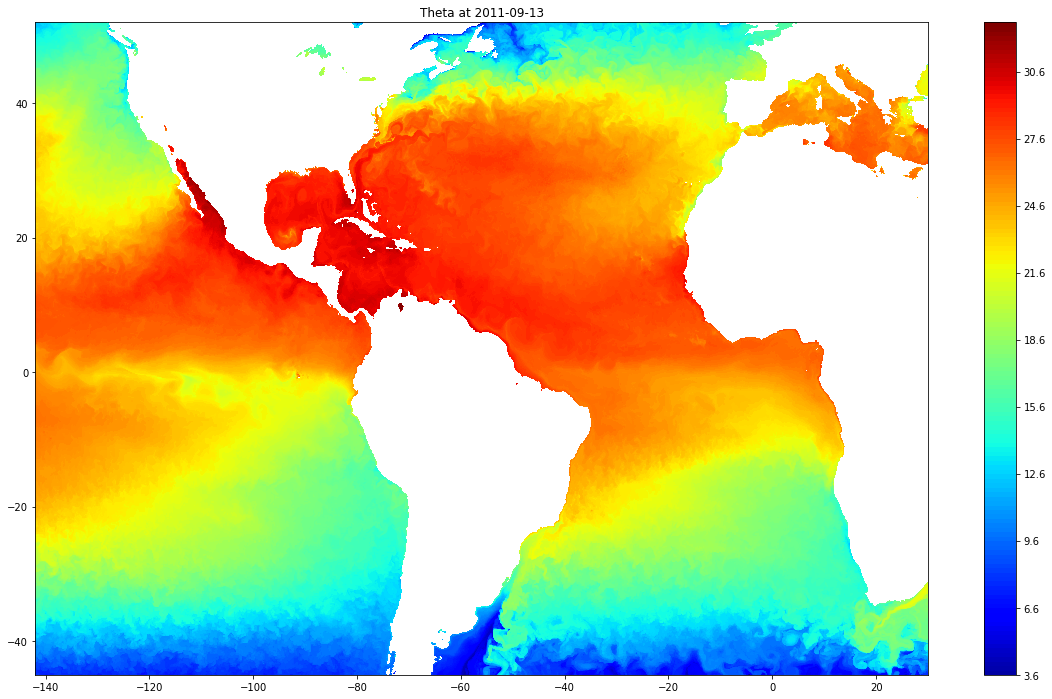

In [6]:
llc4320_utils.plotvar_from_latlonbox(min_lon,min_lat,max_lon,max_lat,"Theta",cmap="jet")

## Partitioning BMs and IGWs

Relative vorticity (RV) spectra are shown below for two regions within the Canarias current in summer (august-september-october). IGW modes 1,2,3,4 and 10 are displayed as well, according to the dispersion relation:

$\omega^2_n (k_h) = \frac{N^2+\left(\frac{n\pi f}{k_h H}\right)^2}{1+\left(\frac{n\pi}{k_h H}\right)^2}$

where$k_h$ is the horizontal wavenumber

$k_h = \sqrt{k_x^2 + k_y^2}$

and $n$ is the mode number.

### Figure 2. $\omega-k_h$ spectra

In [61]:
#reload() solo funciona si el módulo ya fue cargado
import spectral_analysis
reload(spectral_analysis)
import spectral_analysis.tools.spectral_analysis_tools
reload(spectral_analysis.tools.spectral_analysis_tools)
from spectral_analysis.tools.spectral_analysis_tools import plot_bm_igw_k_forseasonvarsid as plot_bm_igw
from spectral_analysis.tools.spectral_analysis_tools import plot_wk_forseasonvarid as plot_wk

# Directorio padre
from spectral_analysis.preprocess.common_vars import data_folder
# Directorio de los datos geográficos
prnt_map = '{}/map_data'.format(data_folder)

In [30]:
spectrum_var = "KE"
season="ASO"

RdC1_data = pd.read_csv('{}/merged_Rd_c1_H_Nbv.csv'.format(data_folder),index_col='s_id')
#RdC1_data.head()

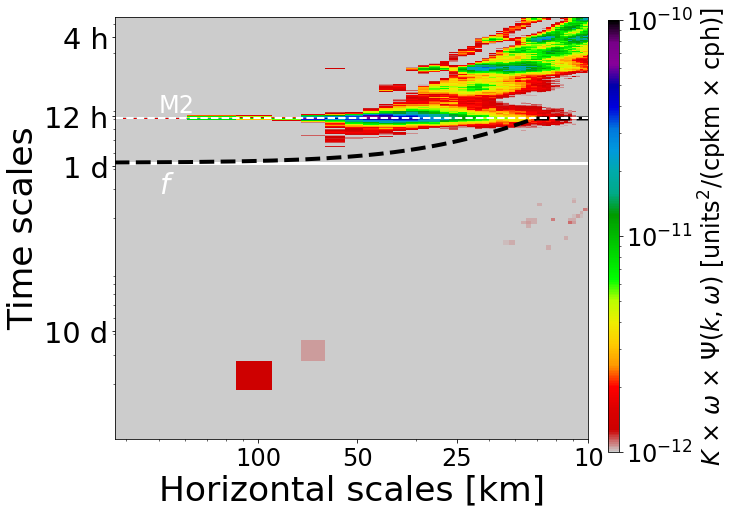

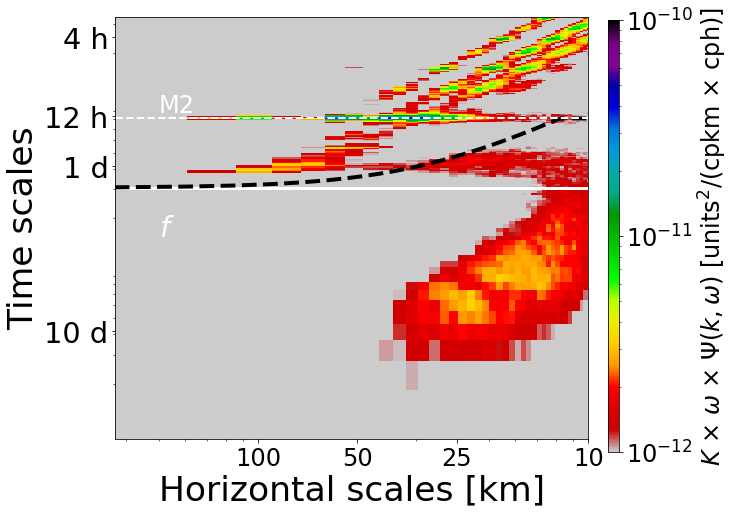

In [37]:
# The result must be the same as the cell above
for id in [771,730]:
    id_data = RdC1_data.loc[id]
    #Nbv = id_data["Nbv_cph"]
    Nbv = id_data["Nbv_cph_2"]
    H = id_data["H"]/1000
    
    plot_wk(data_folder,"ASO","RV",id,Nbv=Nbv,H=H,wk_only=True,log=False)
    #plot_wk(data_folder,"JFM","RV",id,Nbv=Nbv,H=H,wk_only=True,log=False)
    #plot_bm_igw(data_folder,season,vars,id,Nbv=Nbv,H=H,log=False)

### Figure 4. Estimation of BM to IGW transition scale $L_t$

At this stage, our aim is to find the horizontal scale at which balanced motions (BMs) and internal gravity waves (IGWs) are equal for a given variable (e.g. KE, DIV, RV, SSH). We will call this the _transition scale_, $L_t$, following \cite{Qiu2018,Torres2018}.

This quantity can be easily calculated by looking for the scale at which the quantity

$R(k_h) = \frac{BM(k_h)}{IGW(k_h)}$

is closer to 1, where

$BM(k_h) = \int_{\omega_{min}}^{\omega_{10}(k_h)}\hat{V}(\omega,k_h)) d\omega$

$IGW(k_h) = \int_{\omega_{10}}^{\omega_{max}(k_h)}\hat{V}(\omega,k_h)) d\omega$

and V is the variabe of interest (typically the kinetic energy, KE), and $\hat{V}$ denotes its Fourier transform.

The transition scale ($L_t$) is estimated using the relative vorticity spectra for the two regions mentioned above, both in the same season (summer). As expected from their spectra, $R(k_h)$ displays opposite slopes, also impacting the estimation of $L_t$.

In [50]:
import matplotlib.pyplot as plt

def show_bm_igw(ids,vars,season,scales_km=(200,10),log=False,colour=None,alpha=1,legend=None):
    data_ = RdC1_data.loc[ids]
    Nbv = data_["Nbv_cph_2"]
    H = data_["H"]/1000
    Rds = data_["Rd1"]
    print(Rds)

    nseasons = 1
    if type(season) is list:
        nseasons = len(season)
    else:
        season = [season]

    nplots = len(vars)
    fig = plt.figure(figsize=(10*nseasons,4.5*len(vars)))
    for season_,nseason in zip(season,range(nseasons)):
        plot_idxx = [nseasons*i+nseason+1 for i in range(nplots)]
        for var,plot_idx in zip(vars,plot_idxx):
            print(var)
            ax = fig.add_subplot(nplots,nseasons,plot_idx)
            plot_bm_igw(data_folder,season_,var,ids,scales_km=scales_km,Nbv=Nbv,H=H,ax=ax,show=False,log=log,colour=colour,alpha=alpha,legend=legend)

    fig.show()

s_id
787    33.780867
762    41.046100
Name: Rd1, dtype: float64
RV
s_id
771    36.201900
730    47.304967
Name: Rd1, dtype: float64
RV


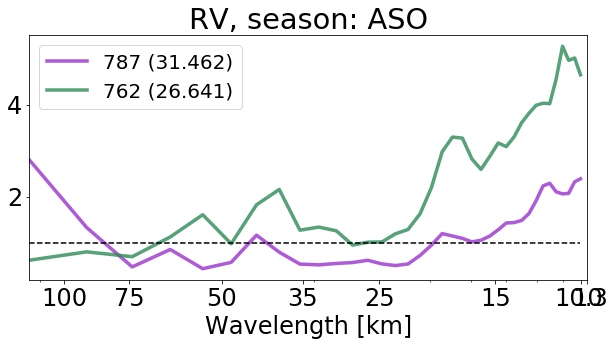

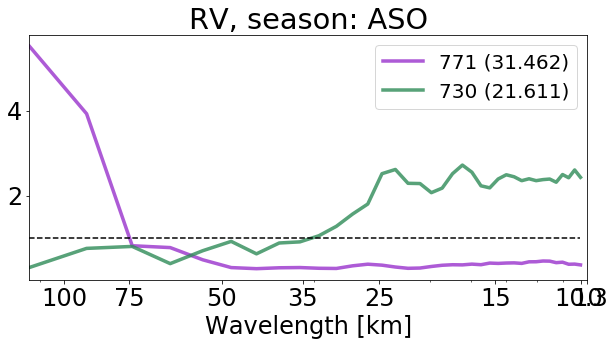

In [62]:
# Canarias y California
#show_bm_igw([762,787,771,730],["RV"],'ASO',scales_km=(110,10))
show_bm_igw([787,762],["RV"],'ASO',scales_km=(110,10),colour=['darkorchid','seagreen'],alpha=0.8,legend=['A','B'])
show_bm_igw([771,730],["RV"],'ASO',scales_km=(110,10),colour=['darkorchid','seagreen'],alpha=0.8,legend=['C','D'])

As a rough estimation, we obtain $L_t$=75 km for the northern region, and $L_t$=35 km for the southern region.

### 

## Filtering motions above and below $L_t$

Now an estimate of BM to IGW transition scale has been obtained, we can go back to physical space (time and lon-lat coordinates) to find out whether $L_t$ is suitable for filtering submesoscale motions.

As we used RV ($\zeta$) to find $L_t$, it is sensible to work with it in the physical space. In Figure 5, $\zeta/f$ is shown for z=0 and z=500 m, along with its corresponding mixed layer baroclinic Rossby number \cite{Bachman2017}

$Ro_b = \left| \frac{\zeta_0 - \zeta_{500}}{f}  \right|$

then their low- and high-pass filtered versions in order to highlight the differences.

### Figure 5. Filtered motions according to $L_t$ for northern and southern regions.

In [4]:
reload(spectral_analysis)
import spectral_analysis.tools
reload(spectral_analysis.tools)
from spectral_analysis.tools import utils_RobKFiltered
#reload(utils_RobKFiltered)

In [5]:
bins = [0.2*n for n in range(20)]
t = 43

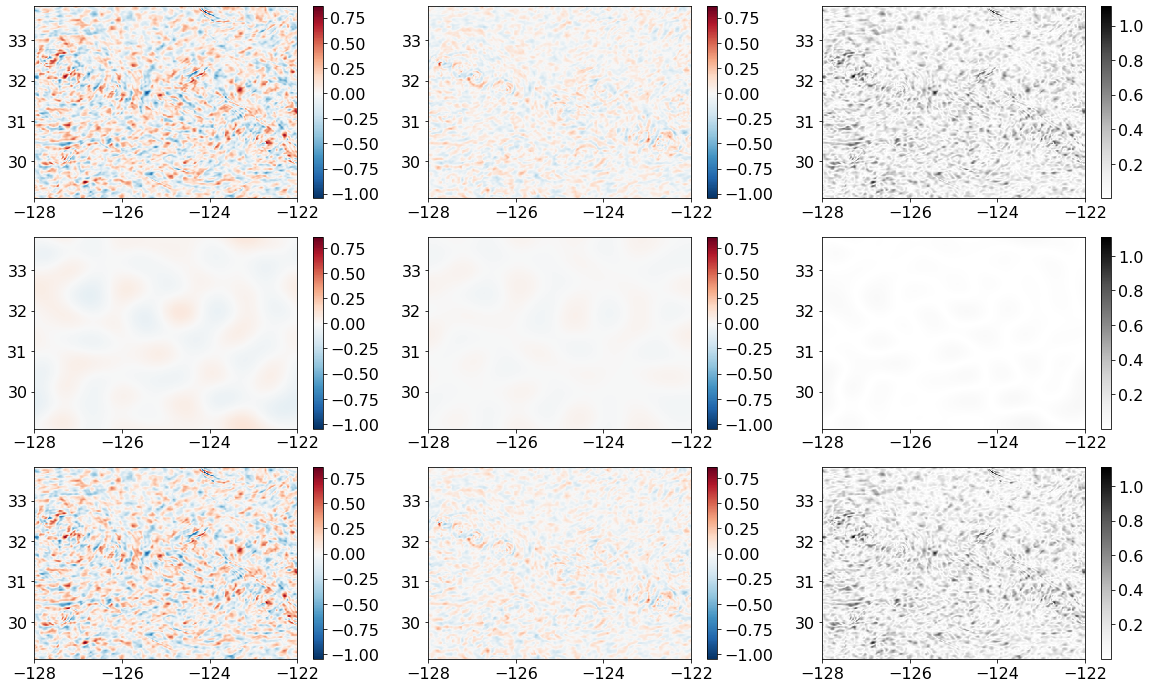

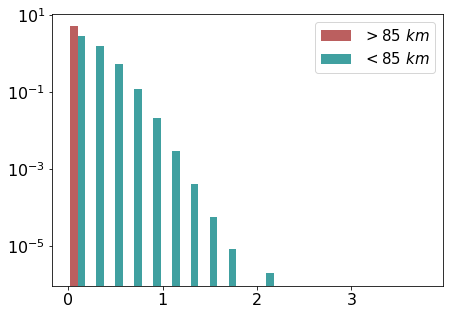

In [6]:
# Region A
utils_RobKFiltered.plot_filtered_daily(787,t=t,show_boxplot=False,show_histogram=True,rob_season="ASO",Lt=85,hist_bins=bins)

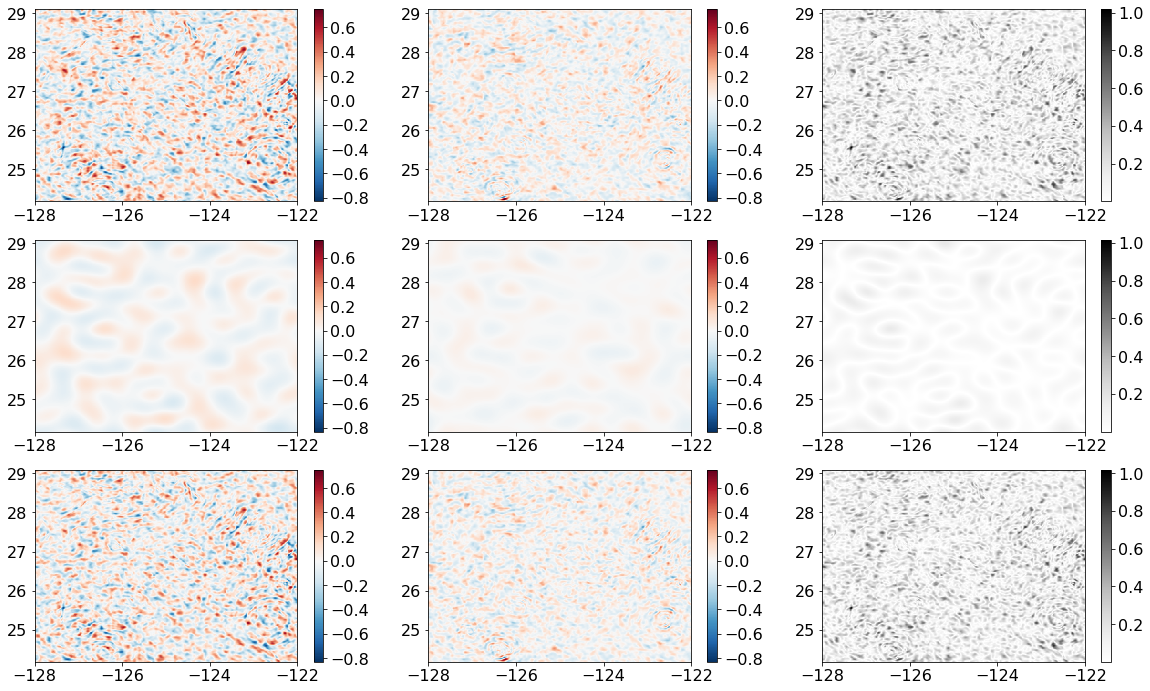

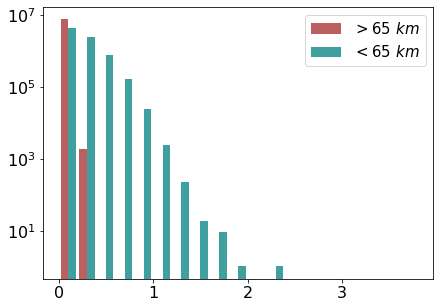

In [62]:
# Region B
utils_RobKFiltered.plot_filtered_daily(762,t=t,show_boxplot=False,show_histogram=True,rob_season="ASO",Lt=65,hist_bins=bins)

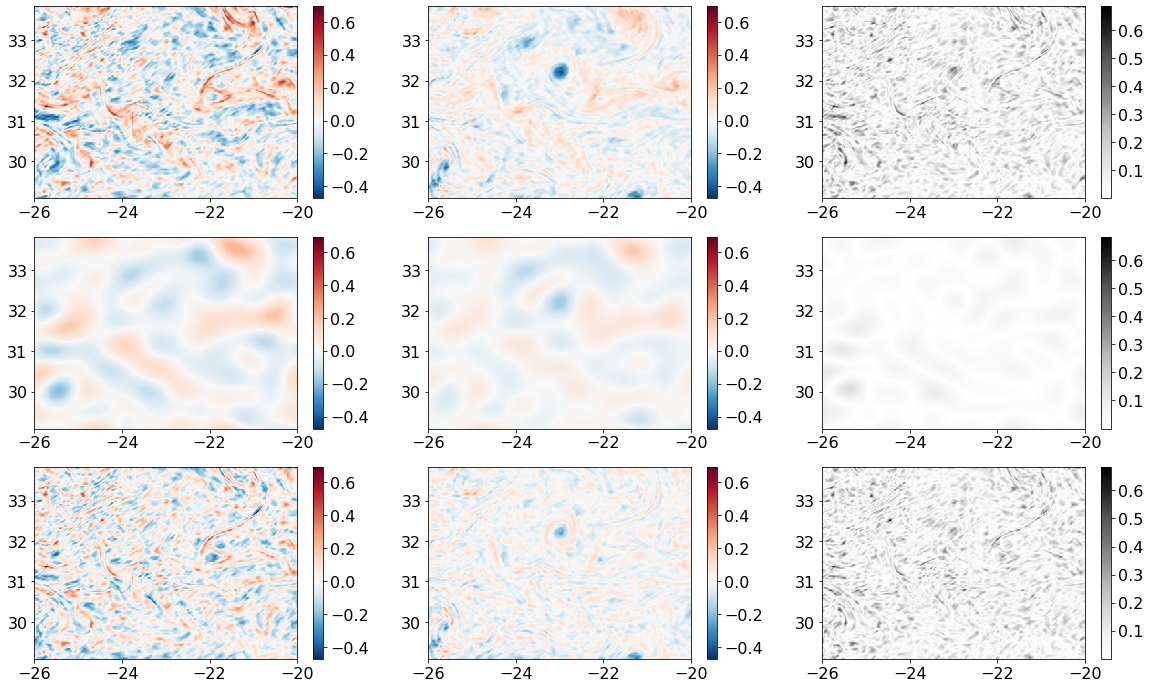

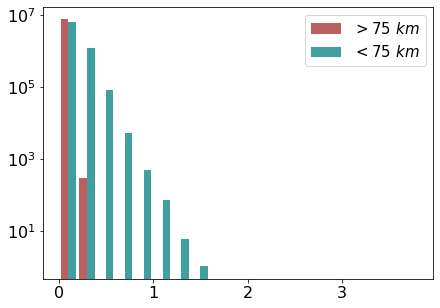

In [63]:
# Region C
utils_RobKFiltered.plot_filtered_daily(771,t=t,show_boxplot=False,show_histogram=True,rob_season="ASO",Lt=75,hist_bins=bins)

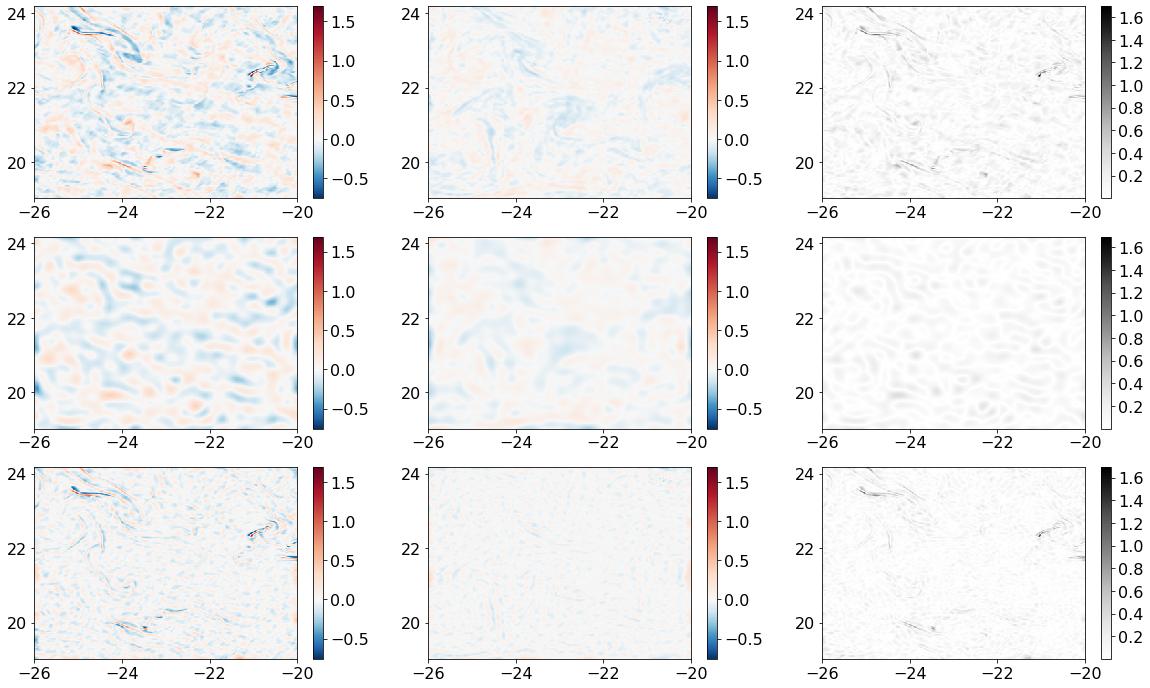

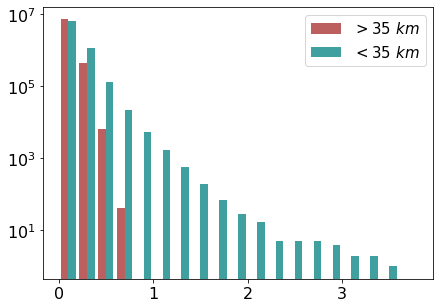

In [64]:
# Region D
utils_RobKFiltered.plot_filtered_daily(730,t=t,rob_season="ASO",show_boxplot=False,show_histogram=True,Lt=35,hist_bins=bins)

# References

(<a id="cit-Qiu2018" href="#call-Qiu2018">Qiu, Chen <em>et al.</em>, 2018</a>) Qiu Bo, Chen Shuiming, Klein Patrice <em>et al.</em>, ``_Seasonality in Transition Scale from Balanced to Unbalanced Motions in the World Ocean_'', Journal of Physical Oceanography, vol. 48, number 3, pp. 591--605, mar 2018.  [online](http://journals.ametsoc.org/doi/10.1175/JPO-D-17-0169.1)

(<a id="cit-Torres2018" href="#call-Torres2018">Torres, Klein <em>et al.</em>, 2018</a>) Torres Hector S., Klein Patrice, Menemenlis Dimitris <em>et al.</em>, ``_Partitioning Ocean Motions Into Balanced Motions and Internal Gravity Waves: A Modeling Study in Anticipation of Future Space Missions_'', Journal of Geophysical Research: Oceans, vol. 123, number 11, pp. 8084--8105, nov 2018.  [online](http://doi.wiley.com/10.1029/2018JC014438)

(<a id="cit-Bachman2017" href="#call-Bachman2017">Bachman, Taylor <em>et al.</em>, 2017</a>) Bachman S. D., Taylor J. R., Adams K. A. <em>et al.</em>, ``_Mesoscale and submesoscale effects on mixed layer depth in the Southern Ocean_'', Journal of Physical Oceanography, vol. 47, number 9, pp. 2173--2188, sep 2017.  [online](http://journals.ametsoc.org/doi/10.1175/JPO-D-17-0034.1)

